In [0]:
import pandas as pd

In [98]:
data = pd.read_csv('employee_retention_data.csv')
data.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22

In [102]:
data.shape

(24702, 8)

In [103]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
quit               0
dtype: int64

In [104]:
data.loc[(data['quit_date'].isnull()), 'quit']=0
data['quit']=data['quit'].fillna(1).astype('int64')
data.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  quit  
0  2015-10-30     1  
1  2014-04-04     1  
2         NaN     0  
3  2013-06-07     1  
4  2014-08-22     1

In [105]:
import datetime
data['quit_date']=data['quit_date'].fillna('2015-12-14')
data.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  quit  
0  2015-10-30     1  
1  2014-04-04     1  
2  2015-12-14     0  
3  2013-06-07     1  
4  2014-08-22     1

In [106]:

data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data['working_days'] =(data['quit_date']- data['join_date']).apply(lambda x:x.total_seconds()/3600/24)
data.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  quit  working_days  
0 2015-10-30     1         585.0  
1 2014-04-04     1         340.0  
2 2015-12-14     0         427.0  
3 2013-06-07     1         389.0  
4 2014-08-22     1        1040.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


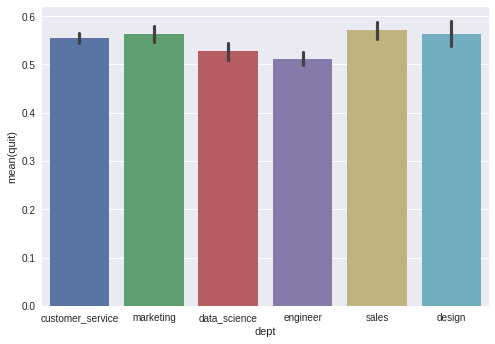

In [107]:
import seaborn as sns
sns.barplot(x='dept',y= 'quit',data=data)

In [108]:
#copy
data1 = data.copy()
data[data['quit']==True].shape[0] / data.shape[0]

0.5469192777912719

In [109]:
sns.pairplot(data)

In [110]:
data[['seniority','salary','working_days']].describe()

seniority         salary  working_days
count  24702.000000   24702.000000  24702.000000
mean      14.127803  138183.345478    574.772164
std        8.089520   76058.184573    361.533472
min        1.000000   17000.000000      4.000000
25%        7.000000   79000.000000    333.000000
50%       14.000000  123000.000000    424.000000
75%       21.000000  187000.000000    781.000000
max       99.000000  408000.000000   1778.000000

In [111]:
#seniority => max 99, 75% 21 => outlier 
sns.stripplot(x ='seniority',data= data)

In [112]:
data['seniority'].value_counts()

8     1008
12     988
6      950
9      944
2      942
16     936
5      936
7      928
10     927
11     924
14     920
15     911
19     910
4      895
13     894
17     893
3      881
18     872
1      861
20     844
23     785
21     782
22     764
24     743
25     715
26     694
27     642
29     626
28     585
99       1
98       1
Name: seniority, dtype: int64

In [113]:

#drop outliers :
data= data[data['seniority']<98]
data.shape

(24700, 9)

In [114]:
sns.violinplot(y='working_days',x='quit',data=data )
data[data['quit']==1]['working_days'].describe()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


count    13508.000000
mean       613.430560
std        328.610626
min        102.000000
25%        361.000000
50%        417.000000
75%        781.000000
max       1726.000000
Name: working_days, dtype: float64

In [115]:
sns.barplot(y='salary',x='quit',data=data )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [116]:
data = pd.get_dummies(columns = ['dept'],data=data)
data.head()

employee_id  company_id  seniority    salary  join_date  quit_date  quit  \
0      13021.0           7         28   89000.0 2014-03-24 2015-10-30     1   
1     825355.0           7         20  183000.0 2013-04-29 2014-04-04     1   
2     927315.0           4         14  101000.0 2014-10-13 2015-12-14     0   
3     662910.0           7         20  115000.0 2012-05-14 2013-06-07     1   
4     256971.0           2         23  276000.0 2011-10-17 2014-08-22     1   

   working_days  dept_customer_service  dept_data_science  dept_design  \
0         585.0                      1                  0            0   
1         340.0                      0                  0            0   
2         427.0                      0                  0            0   
3         389.0                      1                  0            0   
4        1040.0                      0                  1            0   

   dept_engineer  dept_marketing  dept_sales  
0              0               0           0  
1              0               1           0  
2              0               1           0  
3              0               0           0  
4              0               0           0

In [117]:
sns.lmplot(y='salary',x='working_days',data=data,hue='quit',size=10)

In [118]:
data['quit_month']= data[data['quit']==1]['quit_date'].apply(lambda x:x.month)
data['quit_month'].value_counts()

10.0    1317
11.0    1296
5.0     1278
8.0     1234
1.0     1208
7.0     1119
6.0     1067
4.0     1066
3.0     1060
9.0     1047
2.0      930
12.0     886
Name: quit_month, dtype: int64

In [119]:
data.head()

employee_id  company_id  seniority    salary  join_date  quit_date  quit  \
0      13021.0           7         28   89000.0 2014-03-24 2015-10-30     1   
1     825355.0           7         20  183000.0 2013-04-29 2014-04-04     1   
2     927315.0           4         14  101000.0 2014-10-13 2015-12-14     0   
3     662910.0           7         20  115000.0 2012-05-14 2013-06-07     1   
4     256971.0           2         23  276000.0 2011-10-17 2014-08-22     1   

   working_days  dept_customer_service  dept_data_science  dept_design  \
0         585.0                      1                  0            0   
1         340.0                      0                  0            0   
2         427.0                      0                  0            0   
3         389.0                      1                  0            0   
4        1040.0                      0                  1            0   

   dept_engineer  dept_marketing  dept_sales  quit_month  
0              0               0           0        10.0  
1              0               1           0         4.0  
2              0               1           0         NaN  
3              0               0           0         6.0  
4              0               0           0         8.0

In [120]:
X=data.drop(['quit_month','employee_id','join_date','quit_date','quit_month'],axis=1)
X.head()

company_id  seniority    salary  quit  working_days  dept_customer_service  \
0           7         28   89000.0     1         585.0                      1   
1           7         20  183000.0     1         340.0                      0   
2           4         14  101000.0     0         427.0                      0   
3           7         20  115000.0     1         389.0                      1   
4           2         23  276000.0     1        1040.0                      0   

   dept_data_science  dept_design  dept_engineer  dept_marketing  dept_sales  
0                  0            0              0               0           0  
1                  0            0              0               1           0  
2                  0            0              0               1           0  
3                  0            0              0               0           0  
4                  1            0              0               0           0

In [121]:
y= X['quit']
X = X.drop(['quit'],axis = 1)
X.head() 

company_id  seniority    salary  working_days  dept_customer_service  \
0           7         28   89000.0         585.0                      1   
1           7         20  183000.0         340.0                      0   
2           4         14  101000.0         427.0                      0   
3           7         20  115000.0         389.0                      1   
4           2         23  276000.0        1040.0                      0   

   dept_data_science  dept_design  dept_engineer  dept_marketing  dept_sales  
0                  0            0              0               0           0  
1                  0            0              0               1           0  
2                  0            0              0               1           0  
3                  0            0              0               0           0  
4                  1            0              0               0           0

In [0]:
X_= X
X = pd.get_dummies(X,columns=['company_id'])

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
model = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
y_pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
#overfit

0.9638345362935391
0.7515639147963709


In [125]:
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
fimp = pd.DataFrame(values,columns =['column','ratio']).sort_values('ratio',ascending=False)
fimp

column     ratio
0            working_days  0.793404
1                  salary  0.080395
2               seniority  0.050011
3            company_id_1  0.007203
4            company_id_2  0.007167
5          dept_marketing  0.005523
6              dept_sales  0.005234
7            company_id_5  0.005183
8            company_id_3  0.005118
9       dept_data_science  0.004992
10          dept_engineer  0.004748
11           company_id_9  0.004366
12           company_id_4  0.004292
13           company_id_7  0.003998
14            dept_design  0.003815
15           company_id_6  0.003719
16           company_id_8  0.003698
17  dept_customer_service  0.003576
18          company_id_10  0.003445
19          company_id_11  0.000101
20          company_id_12  0.000013

In [126]:
sns.barplot(y=fimp['column'],x=fimp['ratio'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [127]:
# Show Feature Ranking
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(X_train,y_train)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(X_train,y_train)
from sklearn.feature_selection import f_regression
ffs = f_regression(X_train,y_train)
rankinfo = ffs[0]
print(rankinfo)

[2.63282994e-01 3.00474599e+01 2.38606112e+02 6.10321342e+00
 5.15830655e+00 1.77961352e-01 2.69102129e+01 9.64379990e+00
 1.87211066e+00 7.01966945e-01 6.62490523e+00 3.13517833e-01
 1.12146107e+00 3.30130030e-01 8.10172007e-01 8.22055011e-01
 4.80184444e-01 2.30100375e-02 5.11957115e-01 1.98947121e+00
 4.27080626e-01]


In [128]:
fearank = pd.DataFrame(rankinfo,X_train.columns).reset_index()
fearank.columns =['feature','rank']
fearank = fearank.sort_values('rank',ascending=False)
fearank

feature        rank
2            working_days  238.606112
1                  salary   30.047460
6           dept_engineer   26.910213
7          dept_marketing    9.643800
10           company_id_2    6.624905
3   dept_customer_service    6.103213
4       dept_data_science    5.158307
19          company_id_11    1.989471
8              dept_sales    1.872111
12           company_id_4    1.121461
15           company_id_7    0.822055
14           company_id_6    0.810172
9            company_id_1    0.701967
18          company_id_10    0.511957
16           company_id_8    0.480184
20          company_id_12    0.427081
13           company_id_5    0.330130
11           company_id_3    0.313518
0               seniority    0.263283
5             dept_design    0.177961
17           company_id_9    0.023010

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


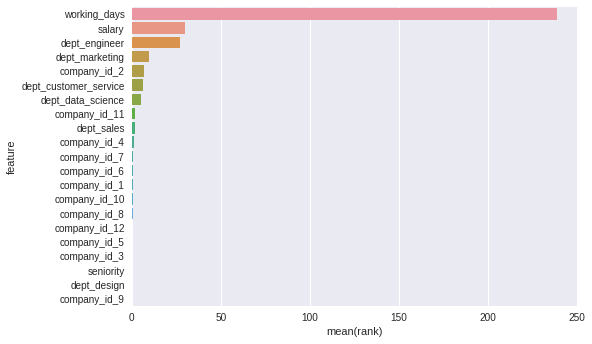

In [129]:
sns.barplot(y=fearank['feature'],x=fearank['rank'])

In [130]:
#resolve overfit K_fold
from sklearn import cross_validation as cval

cval_score=cval.cross_val_score(model)

from sklearn import cross_validation

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TypeError: ignored

In [132]:
days = pd.date_range('2011/01/23','2015/12/13')
days

DatetimeIndex(['2011-01-23', '2011-01-24', '2011-01-25', '2011-01-26',
               '2011-01-27', '2011-01-28', '2011-01-29', '2011-01-30',
               '2011-01-31', '2011-02-01',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1786, freq='D')

In [133]:
days = pd.DataFrame(days,columns=['day'])
days.head()

day
0 2011-01-23
1 2011-01-24
2 2011-01-25
3 2011-01-26
4 2011-01-27

In [134]:

companys = pd.DataFrame(data=[1,2,3,4,5,6,7,8,9,10,11,12], columns=["company_id"])
companys

company_id
0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12

In [135]:
days['id']  = 1
companys['id'] = 1
data_headcount = pd.merge(days,companys,on='id')
del data_headcount['id']
data_headcount.head()

day  company_id
0 2011-01-23           1
1 2011-01-23           2
2 2011-01-23           3
3 2011-01-23           4
4 2011-01-23           5

In [136]:
def get_headcount(row):
  temp = data[(data['company_id']==row['company_id'])&(data['join_date']<=row['day'])].shape[0] - data[(data['company_id']==row['company_id'])&(data['quit_date']<=row['day'])].shape[0]
  return temp
data_headcount['employee_headcount'] = data_headcount.apply(get_headcount, axis=1)
data_headcount.head()

day  company_id  employee_headcount
0 2011-01-23           1                   0
1 2011-01-23           2                   0
2 2011-01-23           3                   0
3 2011-01-23           4                   0
4 2011-01-23           5                   0